# Project: No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project is based on the dataset related to the information of 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. The dataset is provided by JoniHoppen on Kaggle.

The dataset has been provided with number of varaibles which are related to the patients as well as the their show up details for their appointment. The purpose of this project is explore the varaibles relationship with the show up details.

Below are the varaibles which are mentioned in the file:
1. Patient ID 
2. Appointment ID  
3. Gender 
4. Scheduled Day 
5. Appointment Day 
6. Age 
7. Neighbourhood 
8. Scholarship 
9. Hypertension 
10. Diabetes 
11. Alcoholism 
12. Handicap
13. SMS_received
14. Show up 

Questions:

1. How many number of patients turned up for the appointment?
2. How did the gender of the patient differ over the turn up for the appointment?
3. Did the paitents turn up because of the prioir sms of the appointment?
4. what are the total appointments by age group and how did each age group turned up to the appointment?
5. what is propotion of turn up on any day of the week?
6. Are Hypertension and Diabetes patients turn up significantly compared to non-hypertension and diabetes?
7. which Neighbourhood has high number of appointment ?
8. How many patients have Scholarship and does that influence the turn up for the appointment?


In [1]:
# import libaries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
#Load your data
df_noshow = pd.read_csv("KaggleV2-May-2016.csv")

#view dataset
df_noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#check for number of rows and columns
df_noshow.shape

(110527, 14)

In [4]:
#check columns name
df_noshow.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [5]:
#check for missing data
df_noshow.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
#show basic statistical details
df_noshow.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
#check for each variables data types
df_noshow.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [8]:
# data overview
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning (No-show appointments!)

In [9]:
#Replace with lower case labels for dataset and underscore for No show column
df_noshow.rename(columns = lambda x: x.lower().replace("-", "_"), inplace=True)

#confirm changes
df_noshow.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

In [10]:
#Rename hipertension and handcap column labels
df_noshow.rename(columns = {'hipertension' : 'hypertension','handcap' : 'handicap'}, inplace = True)

#confirm changes
df_noshow.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show'],
      dtype='object')

In [11]:
#convert no_show column into numeric values
df_noshow.no_show = df_noshow.no_show.apply(lambda x: 1 if(x == "No")else 0)

#confirm changes
df_noshow.no_show.head()

0    1
1    1
2    1
3    1
4    1
Name: no_show, dtype: int64

In [12]:
#convert appointmentid and scheduledday data type from object to datatime format
df_noshow.scheduledday = pd.to_datetime(df_noshow.scheduledday, format =  '%Y-%m-%dT%H:%M:%SZ')
df_noshow.appointmentday = pd.to_datetime(df_noshow.appointmentday, format =  '%Y-%m-%dT%H:%M:%SZ')

#confirm changes 
df_noshow.dtypes

patientid                float64
appointmentid              int64
gender                    object
scheduledday      datetime64[ns]
appointmentday    datetime64[ns]
age                        int64
neighbourhood             object
scholarship                int64
hypertension               int64
diabetes                   int64
alcoholism                 int64
handicap                   int64
sms_received               int64
no_show                    int64
dtype: object

In [13]:
#Drop age rows which are below 0 and greater than 100
df_noshow.drop(df_noshow[df_noshow.age < 0].index, inplace = True)
df_noshow.drop(df_noshow[df_noshow.age > 100].index, inplace = True)

#confirm changes
df_noshow.age.describe()

count    110519.000000
mean         37.084519
std          23.103165
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         100.000000
Name: age, dtype: float64

In [14]:
#create new week day names column from appointment details
df_noshow["weekday_appointmentid"] = df_noshow.appointmentday.dt.weekday_name

#confirm changes
df_noshow.weekday_appointmentid.head()

0    Friday
1    Friday
2    Friday
3    Friday
4    Friday
Name: weekday_appointmentid, dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (How many number of patients turned up for the appointment?)

In [15]:
#number of patients turned up as well as non turn up for the appointment 
turnup_nonturnup = df_noshow.no_show.value_counts()
turnup = turnup_nonturnup[1]/df_noshow.no_show.count()*100
nonturnup = turnup_nonturnup[0]/df_noshow.no_show.count()*100
print("Turn up vs Non Turn up for the appointment")
print("Turn up =",round(turnup,2),"%")
print("Non Turn up =",round(nonturnup,2),"%")

Turn up vs Non Turn up for the appointment
Turn up = 79.81 %
Non Turn up = 20.19 %


### Research Question 2 (How did the gender of the patient differ over the turn up for the appointment?)

In [16]:
#Turn up by gender
gender = df_noshow.groupby("gender").no_show.value_counts()
print(gender)

gender  no_show
F       1          57241
        0          14591
M       1          30962
        0           7725
Name: no_show, dtype: int64


In [17]:
#Total Appointments by gender in percentage
Female_appointments = gender[0:2].sum()/df_noshow.no_show.count()*100
Male_appointments = gender[2:4].sum()/df_noshow.no_show.count()*100
print("Female =",round(Female_appointments,2), "%")
print("Male =", round(Male_appointments,2), "%")

Female = 65.0 %
Male = 35.0 %


In [18]:
#proportion of turnup by gender in percentage
Female_turnup = gender[0]/gender[0:2].sum()*100
Male_turnup =   gender[2]/gender[2:4].sum()*100
print("Female Turn up =", round(Female_turnup,2),"%")
print("Male Turn up =", round(Male_turnup,2),"%")

Female Turn up = 79.69 %
Male Turn up = 80.03 %


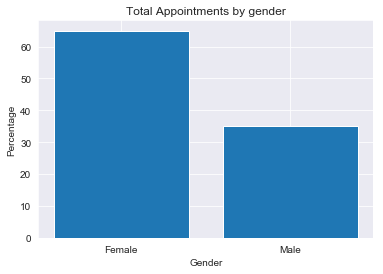

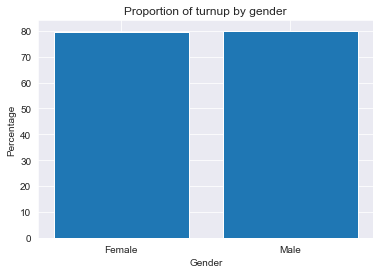

In [19]:
#plot graph
plt.bar(["Female", "Male"], [Female_appointments, Male_appointments])
plt.title("Total Appointments by gender")
plt.xlabel("Gender")
plt.ylabel("Percentage");
plt.show()

plt.bar(["Female", "Male"], [Female_turnup, Male_turnup])
plt.title("Proportion of turnup by gender")
plt.xlabel("Gender")
plt.ylabel("Percentage");
plt.show()

The females had a significantly high number of appointments compared to men. However, the turn up ratio for both has been very similar and is around 80%.


### Research Question 2  (Did the paitents turn up because of the prioir sms of the appointment?)

In [20]:
#SMS 
sms = df_noshow.groupby("sms_received").no_show.value_counts()
print(sms)

sms_received  no_show
0             1          62506
              0          12532
1             1          25697
              0           9784
Name: no_show, dtype: int64


In [21]:
#Number of patients who received SMS prior to the appointment
sms_received = sms[2:4].sum()
sms_received_percentage = sms[2:4].sum()/df_noshow.no_show.count()*100
print("Total number of SMS received by the patients = ", sms_received)
print("SMS received by percentage =", round(sms_received_percentage))

Total number of SMS received by the patients =  35481
SMS received by percentage = 32.0


In [22]:
#proportion of turnup and no turnup who has received sms prior to the appointment
sms_received_turnup = sms[2]/sms_received*100
sms_received_noturnup = sms[3]/sms_received*100
print("patients who received sms and turned up for the appointment in percentage =",sms_received_turnup)
print("patients who received sms and haven't turned up for the appointment in percentage =",sms_received_noturnup)

patients who received sms and turned up for the appointment in percentage = 72.42467799667428
patients who received sms and haven't turned up for the appointment in percentage = 27.575322003325724


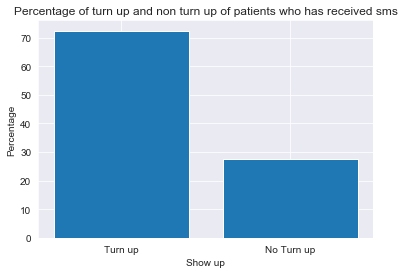

In [23]:
plt.bar(["Turn up", "No Turn up"], [sms_received_turnup, sms_received_noturnup])
plt.title("Percentage of turn up and non turn up of patients who has received sms")
plt.xlabel("Show up")
plt.ylabel("Percentage");
plt.show()

There are only 32% of the patients have received the SMS and turn up percentage among them has been around 72%. Nevertheless, people who haven't received SMS has higher proportionate of turn up. Hence, we need to deepen our analysis to observe the waiting time i.e. difference between scheduled day and appointment day to observe whether SMS influences the patients to turn up or not.

### Research Question 3  (what are the total appointments by age group and how did each age group turned up to the appointment?)

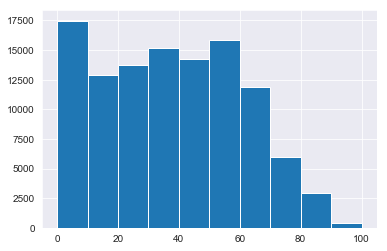

In [24]:
#histogram for age varaible
df_noshow.age.hist();

In [25]:
#Total appointments by each age group
age_0to20 = df_noshow.query("age >= 0 & age <= 20").no_show.value_counts()
age_21to40 = df_noshow.query("age >= 21 & age <= 40").no_show.value_counts()
age_41to60 = df_noshow.query("age >= 41 & age <= 60").no_show.value_counts()
age_61to80 = df_noshow.query("age >= 61 & age <= 80").no_show.value_counts()
age_81to100 = df_noshow.query("age >= 81 & age <= 100").no_show.value_counts()
print("Total Appointments by each age group as follows:")
print("Age 0 to 20 =",age_0to20.sum(),"- in percentage",round(age_0to20.sum()/df_noshow.no_show.count()*100,2),"%")
print("Age 21 to 40 =",age_21to40.sum(),"- in percentage",round(age_21to40.sum()/df_noshow.no_show.count()*100,2),"%")
print("Age 41 to 60 =",age_41to60.sum(),"- in percentage",round(age_41to60.sum()/df_noshow.no_show.count()*100,2),"%")
print("Age 61 to 80 =",age_61to80.sum(),"- in percentage",round(age_61to80.sum()/df_noshow.no_show.count()*100,2),"%")
print("Age 81 to 100 =",age_81to100.sum(), "- in percentage",round(age_81to100.sum()/df_noshow.no_show.count()*100,2),"%")

Total Appointments by each age group as follows:
Age 0 to 20 = 31848 - in percentage 28.82 %
Age 21 to 40 = 28835 - in percentage 26.09 %
Age 41 to 60 = 30081 - in percentage 27.22 %
Age 61 to 80 = 16910 - in percentage 15.3 %
Age 81 to 100 = 2845 - in percentage 2.57 %


In [26]:
#proportionate of turn up by the patients for each age group
age0to20 = age_0to20[1]/age_0to20.sum()*100
age21to40 = age_21to40[1]/age_21to40.sum()*100
age41to60 = age_41to60[1]/age_41to60.sum()*100
age61to80 = age_61to80[1]/age_61to80.sum()*100
age81to100 = age_81to100[1]/age_81to100.sum()*100
print("proportionate of turn up by the patients for each age group in percentage:")
print("Age 0 to 20 =", round(age0to20,2),"%")
print("Age 21 to 40 =", round(age21to40,2),"%")
print("Age 41 to 60 =", round(age41to60,2),"%")
print("Age 61 to 80 =", round(age61to80,2),"%")
print("Age 81 to 100 =", round(age61to80,2),"%")

proportionate of turn up by the patients for each age group in percentage:
Age 0 to 20 = 77.72 %
Age 21 to 40 = 77.02 %
Age 41 to 60 = 81.41 %
Age 61 to 80 = 85.0 %
Age 81 to 100 = 85.0 %


In [27]:
#chart (proportionate of turn up vs non turn up by the patients for each age group)
turnup_proportionsbyage = [age0to20,age21to40, age41to60,age61to80,age81to100]
noturnup_proportionsbyage = [100 - age0to20,100 - age21to40, 100 - age41to60,100 - age61to80,100 - age81to100]
ind = np.arange(len(turnup_proportionsbyage))
width = 0.35

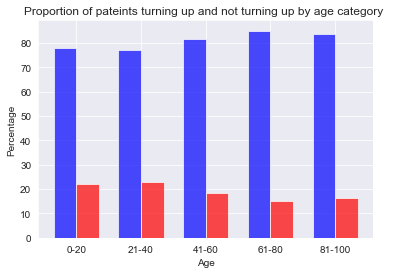

In [28]:
#plot bars
turnup_bars = plt.bar(ind, turnup_proportionsbyage, width, color= 'b', alpha = .7, label = "Patient Turn up")
noturnup_bars = plt.bar(ind+width, noturnup_proportionsbyage,width, color= 'r', alpha = .7, label = "Patient Not Turn up" )

# title and labels
plt.ylabel('Percentage')
plt.xlabel('Age')
plt.title('Proportion of pateints turning up and not turning up by age category ')
locations = ind + width /2
labels = (['0-20','21-40','41-60','61-80','81-100'])
plt.xticks(locations, labels)
plt.show()

82% of the Patients of this dataset were aged below 60. The proportionate of turn up for aged people is relatively higher than the patients who are aged 0 to 40. All the age groups have turn up ratio of more than 75%. 

### Research Question 4  (what is propotion of turn up on any day of the week?)

In [29]:
#show up on the day of the week
weekday_noshow = df_noshow.groupby(["weekday_appointmentid"]).no_show.value_counts()
print(weekday_noshow)

weekday_appointmentid  no_show
Friday                 1          14981
                       0           4037
Monday                 1          18023
                       0           4689
Saturday               1             30
                       0              9
Thursday               1          13908
                       0           3336
Tuesday                1          20487
                       0           5152
Wednesday              1          20774
                       0           5093
Name: no_show, dtype: int64


In [30]:
#Total appointments based on the day of the week
monday_sum = weekday_noshow.iloc[2:4].sum()
tuesday_sum = weekday_noshow.iloc[8:10].sum()
wednesday_sum = weekday_noshow.iloc[10:12].sum()
thursday_sum = weekday_noshow.iloc[6:8].sum()
friday_sum = weekday_noshow.iloc[0:2].sum()
saturday_sum = weekday_noshow.iloc[4:6].sum()
print("Number of appointments based on the day of the week as follows:")
print("Monday =", monday_sum)
print("Tuesday =", tuesday_sum)
print("Wednesday =", wednesday_sum)
print("Thursday =", thursday_sum)
print("Friday =", friday_sum)
print("Saturday =",saturday_sum)

Number of appointments based on the day of the week as follows:
Monday = 22712
Tuesday = 25639
Wednesday = 25867
Thursday = 17244
Friday = 19018
Saturday = 39


In [31]:
#Total appointments based on the day of the week in percentage
monday = monday_sum/df_noshow.no_show.count()*100
tuesday = tuesday_sum/df_noshow.no_show.count()*100
wednesday = wednesday_sum/df_noshow.no_show.count()*100
thursday = thursday_sum/df_noshow.no_show.count()*100
friday = friday_sum/df_noshow.no_show.count()*100
saturday = saturday_sum/df_noshow.no_show.count()*100
print("Number of appointments in percentage based on the day of the week as follows:")
print("Monday =", round(monday,2),"%")
print("Tuesday =", round(tuesday,2), "%")
print("Wednesday =", round(wednesday,2),"%")
print("Thursday =", round(thursday,2), "%")
print("Friday =", round(friday,2), "%")
print("Saturday =",round(saturday,2), "%")

Number of appointments in percentage based on the day of the week as follows:
Monday = 20.55 %
Tuesday = 23.2 %
Wednesday = 23.41 %
Thursday = 15.6 %
Friday = 17.21 %
Saturday = 0.04 %


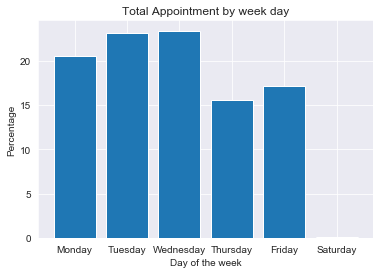

In [32]:
#plot bar chart
plt.bar(["Monday", "Tuesday", "Wednesday", "Thursday","Friday" , "Saturday"], [monday, tuesday, wednesday, thursday, friday, saturday])
plt.title("Total Appointment by week day")
plt.xlabel("Day of the week")
plt.ylabel("Percentage");
plt.show()

In [33]:
#proportionate of turn up on any day of the week
monday_turnup = weekday_noshow.iat[2]/monday_sum*100
tuesday_turnup = weekday_noshow.iat[8]/tuesday_sum*100
wednesday_turnup = weekday_noshow.iat[10]/wednesday_sum*100
thursday_turnup = weekday_noshow.iat[6]/thursday_sum*100
friday_turnup = weekday_noshow.iat[0]/friday_sum*100
saturday_turnup = weekday_noshow.iat[4]/saturday_sum*100
print("Proportionate of turn up in percenatge on any day of the week as follows:")
print("Monday =", round(monday_turnup,2),"%")
print("Tuesday =", round(tuesday_turnup,2),"%")
print("Wednesday =", round(wednesday_turnup,2),"%")
print("Thursday =", round(thursday_turnup,2),"%")
print("Friday =", round(friday_turnup,2),"%")
print("Saturday =", round(saturday_turnup,2),"%")

Proportionate of turn up in percenatge on any day of the week as follows:
Monday = 79.35 %
Tuesday = 79.91 %
Wednesday = 80.31 %
Thursday = 80.65 %
Friday = 78.77 %
Saturday = 76.92 %


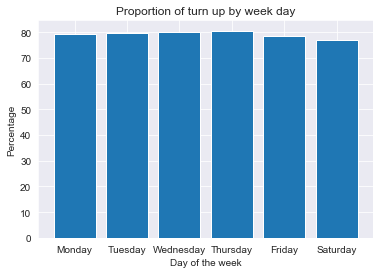

In [34]:
#plot bar chart
plt.bar(["Monday", "Tuesday", "Wednesday", "Thursday","Friday" , "Saturday"], [monday_turnup, tuesday_turnup, wednesday_turnup, thursday_turnup, friday_turnup, saturday_turnup])
plt.title("Proportion of turn up by week day")
plt.xlabel("Day of the week")
plt.ylabel("Percentage");

More than 60% of the appointmnets were on monday, tuesday and wednesday and proproportionate of turn up was around 80%

### Research Question 5  (Are Hypertension and Diabetes patients turn up significantly compared to non-hypertension and diabetes?)

In [35]:
#Hypertension and Diabetes patients
df_noshow_hyperdia = df_noshow.groupby(["hypertension","diabetes"]).no_show.value_counts()
print(df_noshow_hyperdia)

hypertension  diabetes  no_show
0             0         1          69007
                        0          18255
              1         1           1168
                        0            289
1             0         1          12683
                        0           2631
              1         1           5345
                        0           1141
Name: no_show, dtype: int64


In [36]:
#patients who have hypertension and diabetes and turn up to the appointment
df_noshow_hyperdia_turnup = df_noshow_hyperdia[6]/df_noshow_hyperdia[6:8].sum()*100
print("Patients who have hypertension and diabetes and turn up to the appointment =",round(df_noshow_hyperdia_turnup,2),"%")

#patients who dont have hypertension and diabetes and turn up to the appointment
df_noshow_nohyperdia_turnup = df_noshow_hyperdia.iat[0]/df_noshow_hyperdia[0:2].sum()*100
print("Patients who dont have hypertension and diabetes and turn up to the appointment =",round(df_noshow_nohyperdia_turnup,2),"%")

Patients who have hypertension and diabetes and turn up to the appointment = 82.41 %
Patients who dont have hypertension and diabetes and turn up to the appointment = 79.08 %


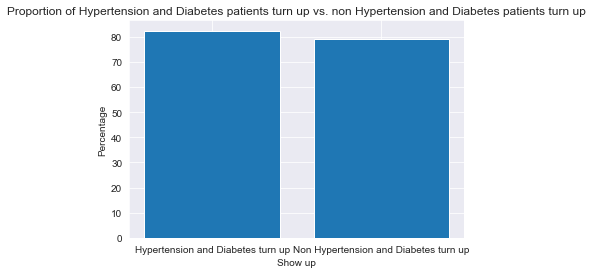

In [37]:
#plot bar chart
plt.bar(["Hypertension and Diabetes turn up", "Non Hypertension and Diabetes turn up"], [df_noshow_hyperdia_turnup, df_noshow_nohyperdia_turnup])
plt.title("Proportion of Hypertension and Diabetes patients turn up vs. non Hypertension and Diabetes patients turn up")
plt.xlabel("Show up")
plt.ylabel("Percentage");
plt.show()

This group of patients has very minimal number of both Hypertension and Diabetes patients. The proportionate of both Hypertension and Diabetes patients are slightly higher than the patients with no Hypertension and Diabetes. 

### Research Question 6  (which Neighbourhood has high number of appointment ?)

In [38]:
#Top 10 neighbourhood
df_noshow_neighbourhood = df_noshow.groupby(["neighbourhood"]).no_show.count()
df_noshow_neighbourhood_plot = df_noshow_neighbourhood.nlargest(10)/df_noshow.no_show.count()*100
print(round(df_noshow_neighbourhood_plot,2))

neighbourhood
JARDIM CAMBURI       6.98
MARIA ORTIZ          5.25
RESISTÊNCIA          4.01
JARDIM DA PENHA      3.51
ITARARÉ              3.18
CENTRO               3.02
TABUAZEIRO           2.83
SANTA MARTHA         2.83
JESUS DE NAZARETH    2.58
BONFIM               2.51
Name: no_show, dtype: float64


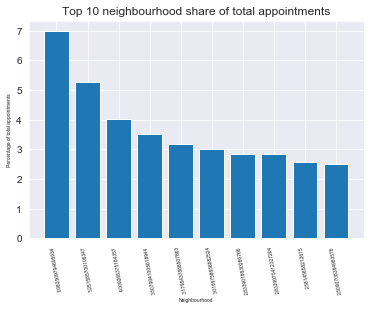

In [39]:
#plot bar chart
plt.bar(df_noshow_neighbourhood_plot.index,df_noshow_neighbourhood_plot.values)
plt.xlabel('Neighbourhood', fontsize=5)
plt.ylabel('Percentage of total appointments', fontsize=5)
plt.xticks(df_noshow_neighbourhood_plot.index, df_noshow_neighbourhood_plot.values, fontsize=5, rotation=100)
plt.title('Top 10 neighbourhood share of total appointments')
plt.show() 

### Research Question 7  (How many patients have Scholarship and does that influence the turn up for the appointment?)

In [40]:
#Scholarship 
df_noshow_scholarship = df_noshow.groupby(["scholarship"]).no_show.value_counts()
print(df_noshow_scholarship)

scholarship  no_show
0            1          79920
             0          19738
1            1           8283
             0           2578
Name: no_show, dtype: int64


In [41]:
print("Patients with no Scholarship =",df_noshow_scholarship[0:2].sum())
print("Patients with Scholarship =",df_noshow_scholarship[2:4].sum())

Patients with no Scholarship = 99658
Patients with Scholarship = 10861


From the above analysis, we can observe that only 10% of patients of this group has scholarship. Since very few patients are enrolled in Brazilian welfare program, we don't see scholarship as significant variable to influence the turn up.  

<a id='conclusions'></a>
## Conclusions

After exploring this dataset related to the patients turn out for the appointment, we observe that 80% of patient have tuned up for the appointment. Across all the categories of variables compared with the no show variable, show us that mostly the turn out for the appointment has been between 76% to 83%. 

The limitation is that the dataset has been only used to provide insights about the data. No forecast of independent variable. We have compared independent variable with only one dependent variable at a time. 
  